# Decision Tree Classification 

## Importing Necessary Libraries 

In [48]:
import pandas as  pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_score,f1_score,recall_score

### Importing DataSet 


In [49]:
df=sns.load_dataset('titanic')

In [50]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [52]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_14416\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [53]:
x=df[['age','fare','sex','pclass','sibsp','parch']]

In [56]:
y=df['survived']

In [55]:
x=pd.get_dummies(x,columns=['sex'])

In [57]:
x.isnull().sum()

age           0
fare          0
pclass        0
sibsp         0
parch         0
sex_female    0
sex_male      0
dtype: int64

In [58]:
x.head()

,age,fare,pclass,sibsp,parch,sex_female,sex_male
0,22.0,7.2500,3,1,0,False,True
1,38.0,71.2833,1,1,0,True,False
2,26.0,7.9250,3,0,0,True,False
3,35.0,53.1000,1,1,0,True,False
4,35.0,8.0500,3,0,0,False,True


In [59]:

x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

In [60]:
model=DecisionTreeClassifier()

In [61]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
y_predict=model.predict(x_test)

In [64]:
print('Accuracy of this model is ',accuracy_score(y_test,y_predict))

Accuracy of this model is  0.7668161434977578


In [65]:
print('Precsion of this model is:',precision_score(y_test,y_predict))

Precsion of this model is: 0.7727272727272727


In [66]:
print('F1 Score of this model is :',f1_score(y_test,y_predict))

F1 Score of this model is : 0.723404255319149


In [67]:
print('Recall score of this model is ',recall_score(y_test,y_predict))

Recall score of this model is  0.68


In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
print('Confusiion matrix score of this model is ', confusion_matrix(y_test,y_predict))

Confusiion matrix score of this model is  [[103  20]
 [ 32  68]]


In [70]:
cm=confusion_matrix(y_test,y_predict)

<Axes: >

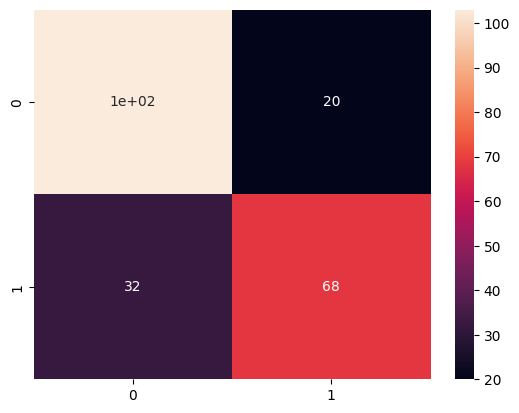

In [71]:
sns.heatmap(cm,annot=True)

# K-Nearest Neighbours    (KNN)

In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
sur_predict=model.predict(x_test)

In [25]:
accuracy_score(y_test,sur_predict)

0.695067264573991

In [26]:
precision_score(y_test,sur_predict)

0.5806451612903226

In [27]:
conf=confusion_matrix(y_test,sur_predict)

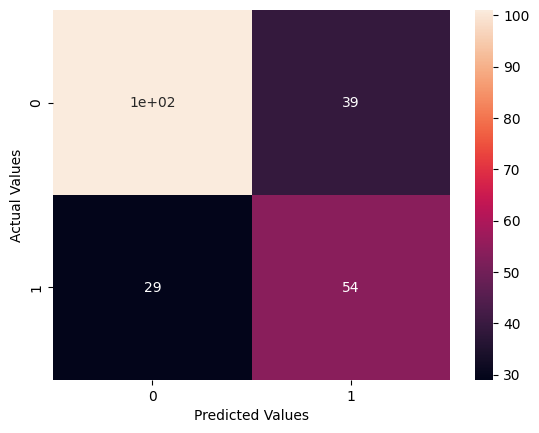

In [28]:
sns.heatmap(conf,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Random-Forest Classification

In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from sklearn.model_selection import train_test_split


In [30]:
x

,age,fare,pclass,sibsp,parch,sex_female,sex_male
0,22.000000,7.2500,3,1,0,False,True
1,38.000000,71.2833,1,1,0,True,False
2,26.000000,7.9250,3,0,0,True,False
3,35.000000,53.1000,1,1,0,True,False
4,35.000000,8.0500,3,0,0,False,True
...,...,...,...,...,...,...,...
886,27.000000,13.0000,2,0,0,False,True
887,19.000000,30.0000,1,0,0,True,False
888,29.699118,23.4500,3,1,2,True,False
889,26.000000,30.0000,1,0,0,False,True


In [31]:
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [32]:
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [33]:
model=RandomForestClassifier()

In [34]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
model_predict=model.predict(x_test)

In [36]:
accuracy_score(y_test,model_predict)

0.7821229050279329

In [37]:
precision_score(y_test,model_predict)

0.6885245901639344

In [38]:
recall_score(y_test,model_predict)

0.6774193548387096

In [39]:
confusion=confusion_matrix(y_test,model_predict)

<Axes: >

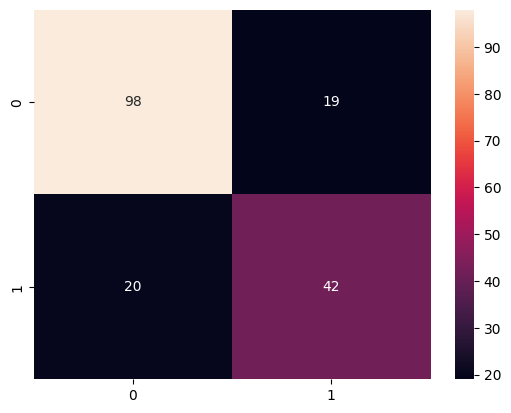

In [40]:
sns.heatmap(confusion,annot=True)


In [41]:
y_test.shape

(179,)

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

print('Accuracy Score:',accuracy_score(y_test,y_predict))
print('f1 Score:',f1_score(y_test,y_predict))
print('Recall Score:',recall_score(y_test,y_predict))
print('confusion_matrix:',confusion_matrix(y_test,y_predict))


Accuracy Score: 0.7486033519553073
f1 Score: 0.64
Recall Score: 0.6451612903225806
confusion_matrix: [[94 23]
 [22 40]]


c:\Users\FATTANI COMPUTERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

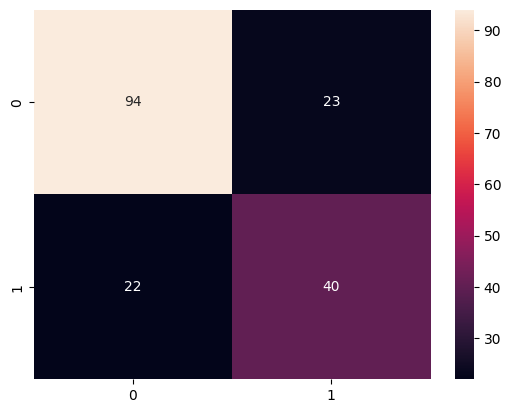

In [43]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# SVM- Support Vector Machine 

In [44]:
from sklearn.svm import SVC

model=SVC()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

print('Accuracy Score:',accuracy_score(y_test,y_predict))
print('f1 Score:',f1_score(y_test,y_predict))
print('Recall Score:',recall_score(y_test,y_predict))
print('confusion_matrix:',confusion_matrix(y_test,y_predict))


Accuracy Score: 0.6536312849162011
f1 Score: 0.38
Recall Score: 0.3064516129032258
confusion_matrix: [[98 19]
 [43 19]]


<Axes: >

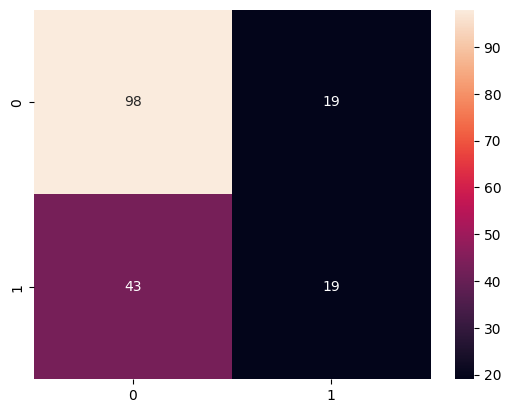

In [45]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Naive Bayes 

In [46]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

print('Accuracy Score:',accuracy_score(y_test,y_predict))
print('f1 Score:',f1_score(y_test,y_predict))
print('Recall Score:',recall_score(y_test,y_predict))
print('confusion_matrix:',confusion_matrix(y_test,y_predict))


Accuracy Score: 0.776536312849162
f1 Score: 0.6610169491525424
Recall Score: 0.6290322580645161
confusion_matrix: [[100  17]
 [ 23  39]]


<Axes: >

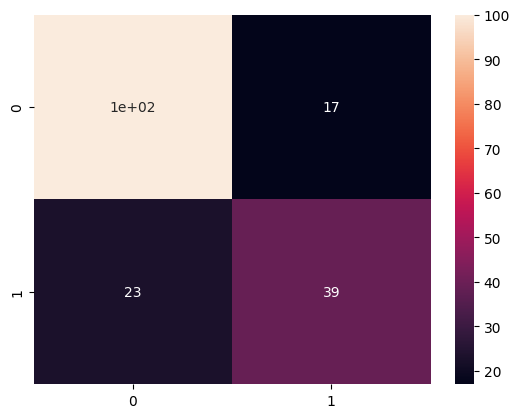

In [47]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)